In [23]:
%pip install seaborn
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

In [27]:
# Load the data
data = pd.read_csv('dataset_for_assignment2.csv')
# Prepare the features and target variable
# Define features and target variable
data['Gender'] = data['Gender'].map({'Male': 0, 'Female': 1})
data['Activity Level'] = data['Activity Level'].map({'Sedentary': 0, 'Moderate': 1, 'Active': 2})
data['Location'] = data['Location'].map({'Urban': 0, 'Suburban': 1, 'Rural': 2})

X = data[['Gender', 'Age', 'Activity Level', 'Location', 'Distance Travelled (km)', 'Calories Burned']]
y = data['App Sessions']

In [28]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Create and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)
# Make predictions on the test set
y_pred = model.predict(X_test)

In [29]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R-squared Score: {r2}')

Mean Squared Error: 140.86147094013972
R-squared Score: 0.9243187132670365


In [34]:
# Print the coefficients and intercept
print('Coefficients:')
for feature, coef in zip(X.columns, model.coef_):
    coefficients_df = pd.DataFrame({
        'Feature': X.columns,
        'Coefficient': model.coef_
    })
print(coefficients_df)
print(f'Intercept: {model.intercept_}')

Coefficients:
                   Feature  Coefficient
0                   Gender     0.004865
1                      Age     0.018220
2           Activity Level    32.689826
3                 Location    -0.339240
4  Distance Travelled (km)     0.286730
5          Calories Burned     0.037411
Intercept: 48.594345582450515


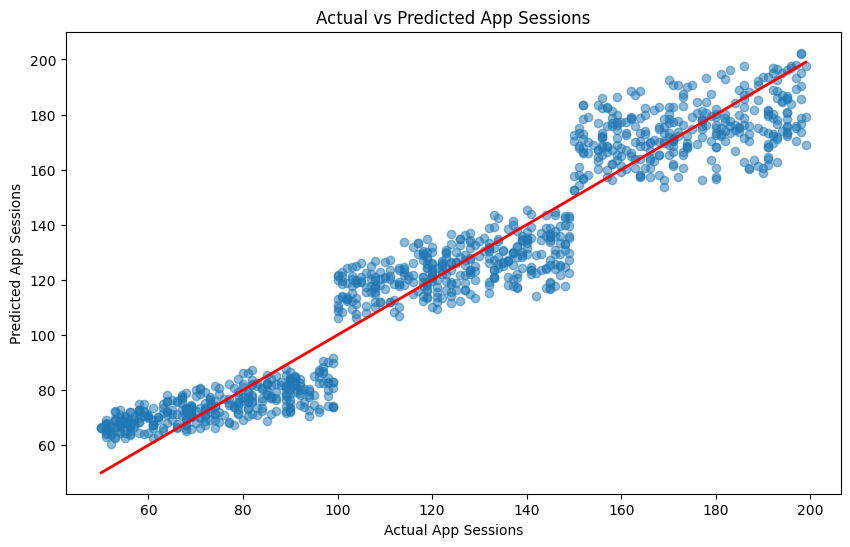

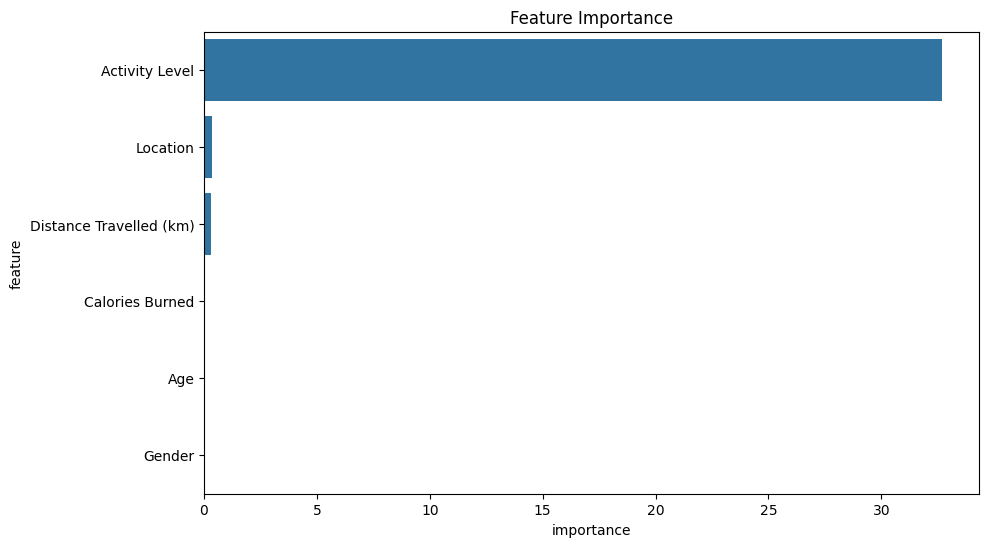

In [32]:
# Visualize the predictions vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Calories Burned')
plt.ylabel('Predicted Calories Burned')
plt.title('Actual vs Predicted Calories Burned')
plt.show()

# Visualize the feature importances
importance = pd.DataFrame({'feature': X.columns, 'importance': np.abs(model.coef_)})
importance = importance.sort_values('importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=importance)
plt.title('Feature Importance')
plt.show()